In [1]:
import os
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["font.size"] = 20
plt.rcParams["axes.formatter.use_mathtext"] = True

In [2]:
RESULTS_DIR = "../../results/SAT"

In [3]:
results = {}

for f_name in os.listdir(RESULTS_DIR):
    instance = Path(f_name).stem
    with open(os.path.join(RESULTS_DIR, f_name), "r") as f:
        results[int(instance)] = json.load(f)

Presetting list of models experimented and parameters stored.

In [4]:
models = results[1].keys()
args = []
for arg in results[1]['un-model'].keys():
    if arg not in ('_extras', 'obj', 'sol', 'optimal'):
        args.append(arg)

In [5]:
instances = range(1, 11)
res_ls_models = {}
for model in models:
    res_ls_models[model] = {}
    for arg in args:
        res_ls_models[model][arg] = [results[i][model][arg] for i in instances]
colors = ['green', 'red', 'blue', 'black', 'pink']
titles = ['Resolution Time', 'Number of restarts', 'Max amount of memory', 'Number of boolean variables', 'Number of Conflicts']


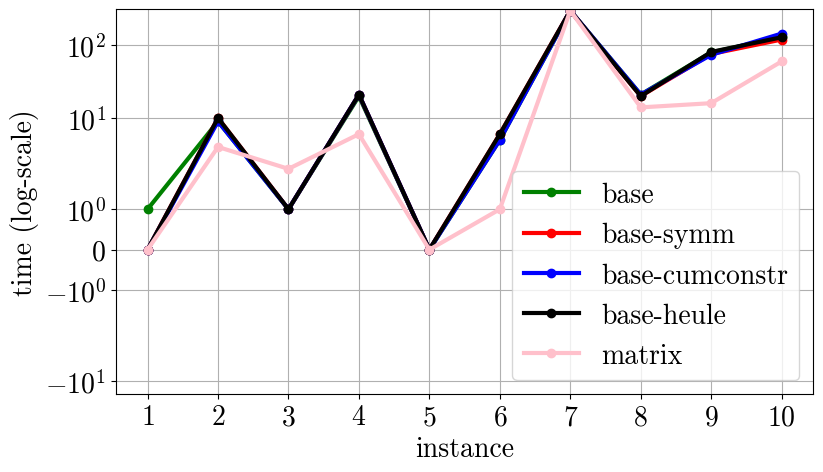

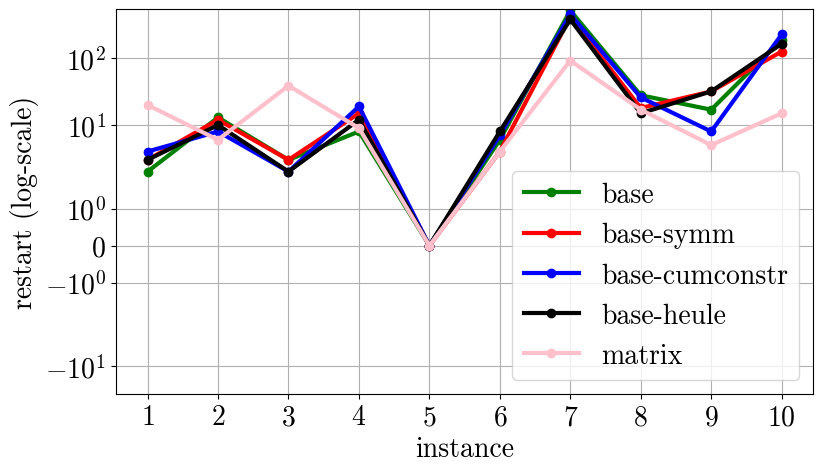

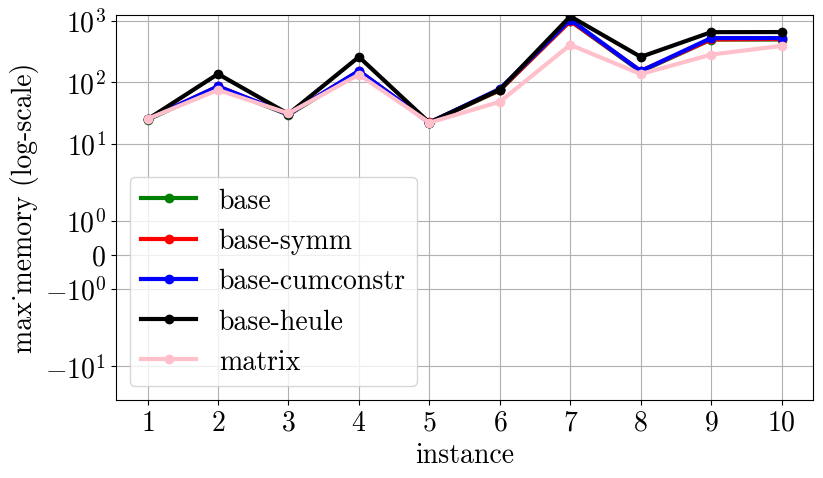

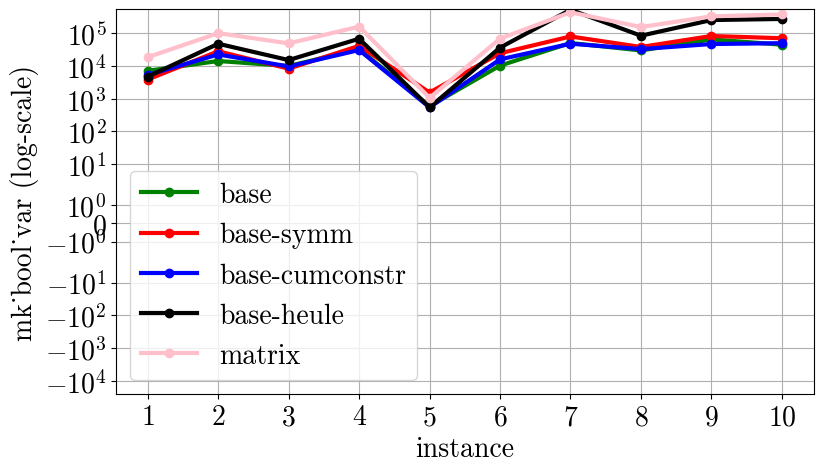

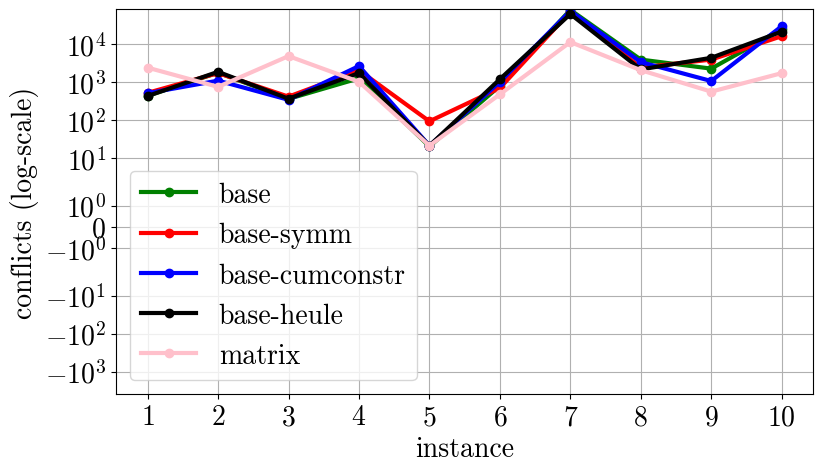

In [19]:
for ind, arg in enumerate(args):
    fig = plt.figure(figsize=(9, 5))
    # plt.subplot(5, 1, ind+1)
    
    labels = ["base", "base-symm", "base-cumconstr", "base-heule", "matrix"]

    for i, model in enumerate(models):
        plt.plot(instances, res_ls_models[model][arg], color=colors[i], marker='o', label=labels[i], linewidth='3')

    plt.grid(True)

    # plt.title(label=f'{titles[ind]}')
    plt.xticks(instances)
    plt.xlabel('instance')
    plt.ylabel(f'{arg} (log-scale)')
    # plt.ylabel(f'{arg}')
    plt.yscale("symlog")
    plt.legend()
    plt.savefig(f"./IMG/{arg}.pdf", bbox_inches="tight")

plt.show()